In this Kernel, I tried different methods for Credit Card Fraud Detection. 
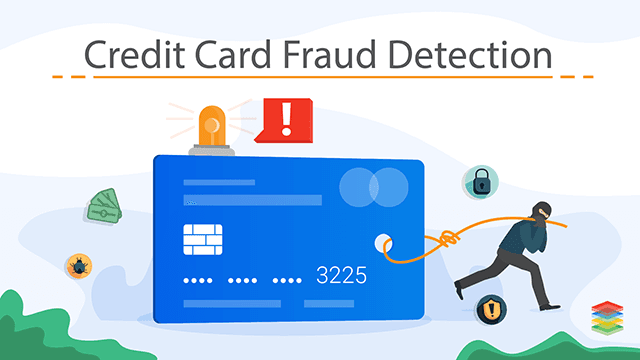
Check the last Cell for knowledge sources.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact,  FloatSlider

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.width=100
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

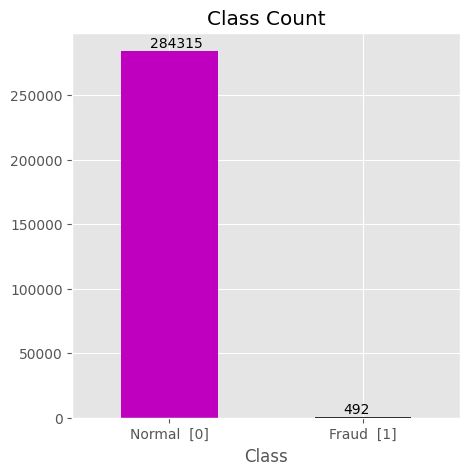

In [9]:
diff_class = df['Class'].value_counts()
diff_class.plot(kind='bar', color=['m', 'k'], figsize=(5, 5))
plt.xticks(range(2), ['Normal  [0]', 'Fraud  [1]'], rotation=0)
for i, v in enumerate(diff_class):
    plt.text(i-0.1, v+3000, str(v))
plt.title('Class Count')
plt.show()

In [10]:
ss = StandardScaler()
df['Amount'] = ss.fit_transform(df[['Amount']])
df['Time'] = ss.fit_transform(df[['Time']])

Distribution of different columns.

C:\Users\Sourav Sahu\AppData\Local\Temp\ipykernel_12732\2460371183.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


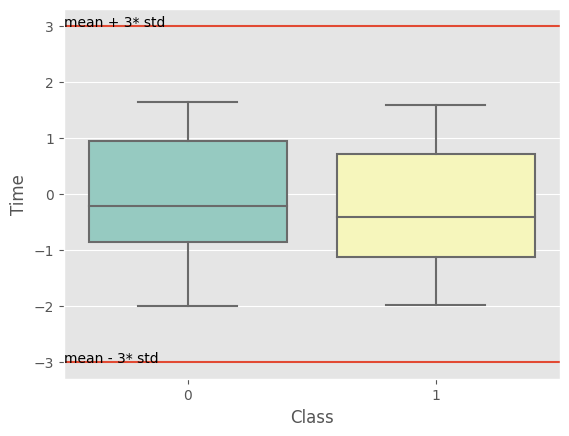

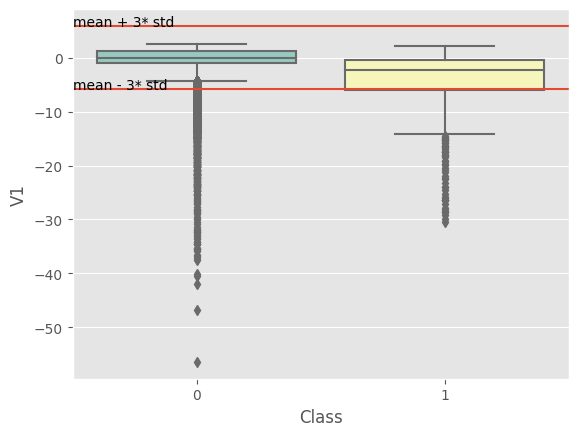

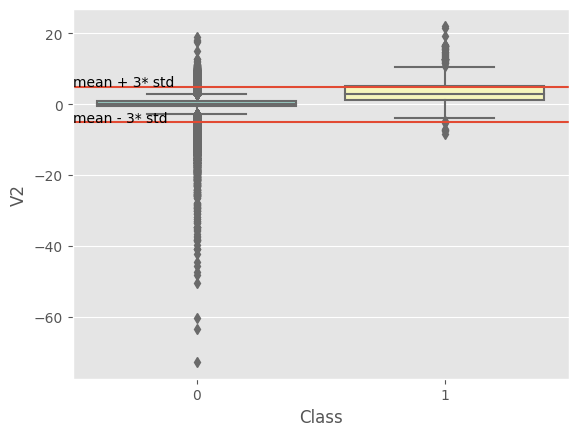

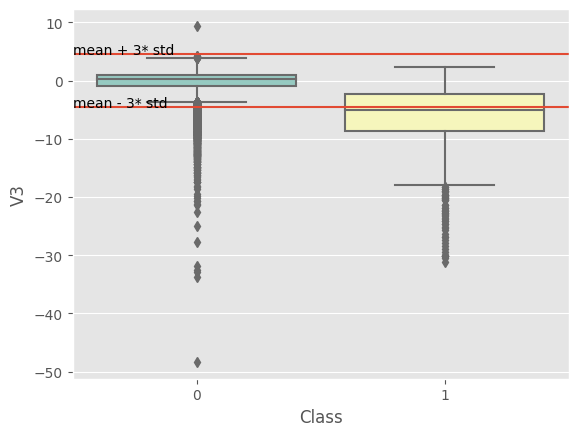

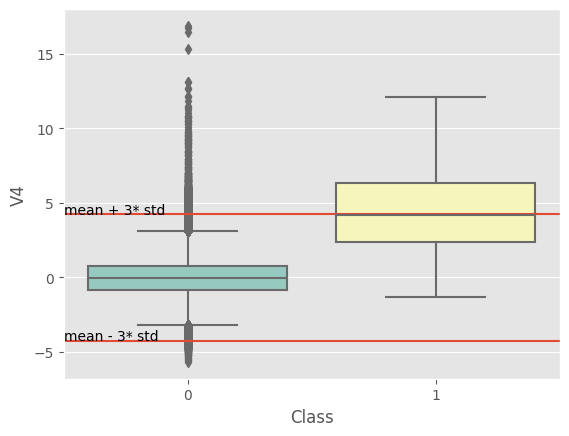

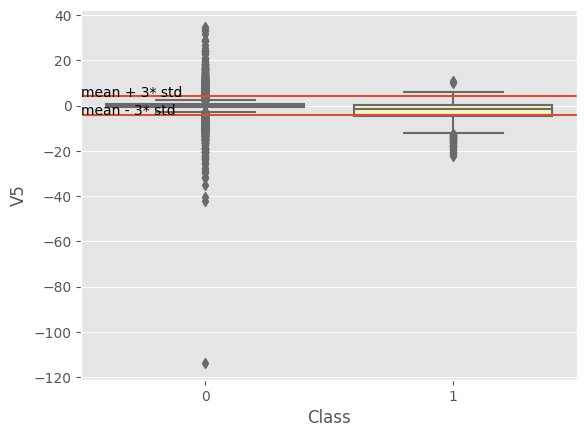

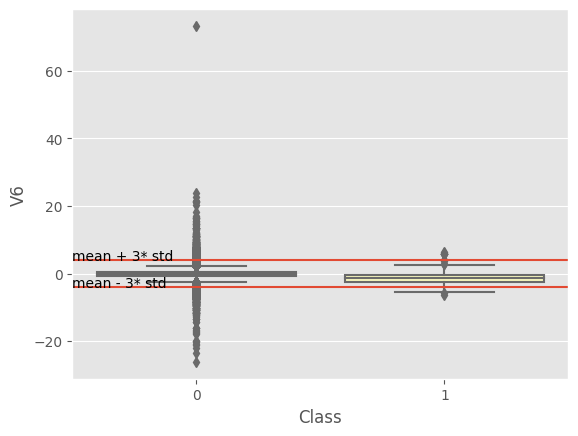

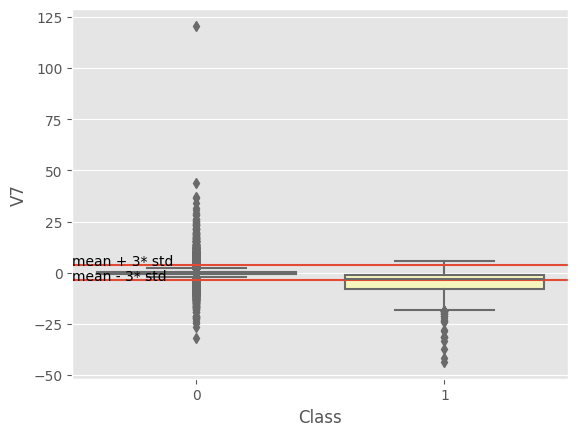

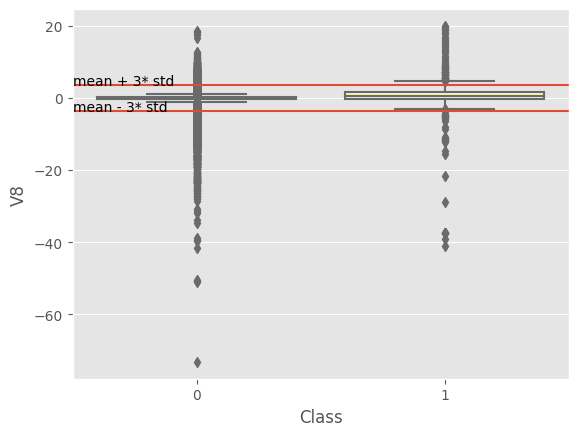

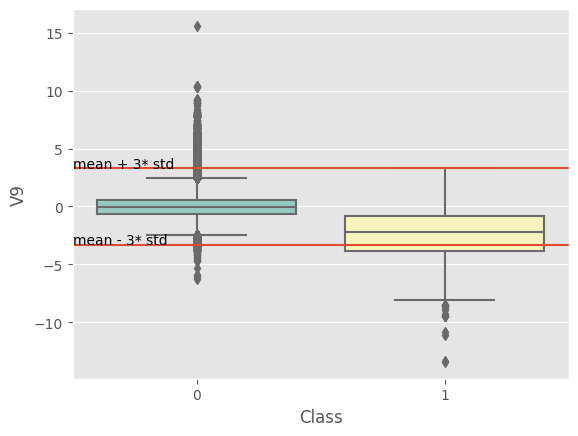

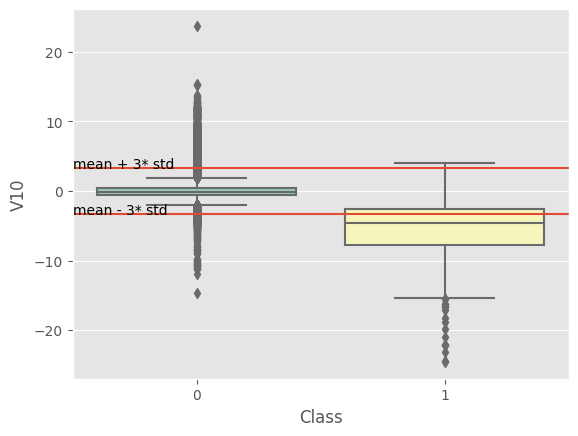

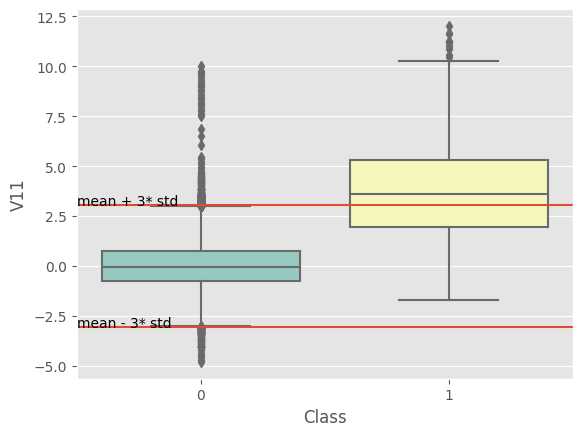

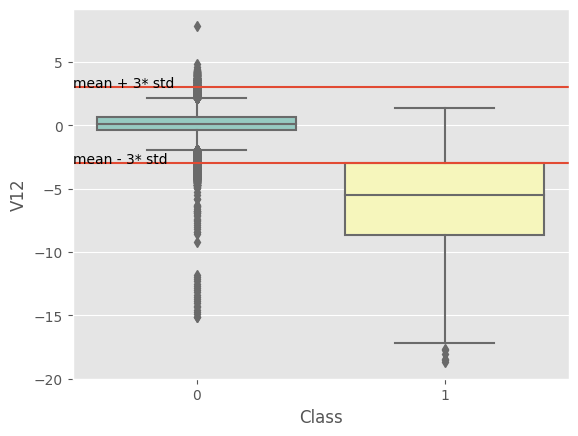

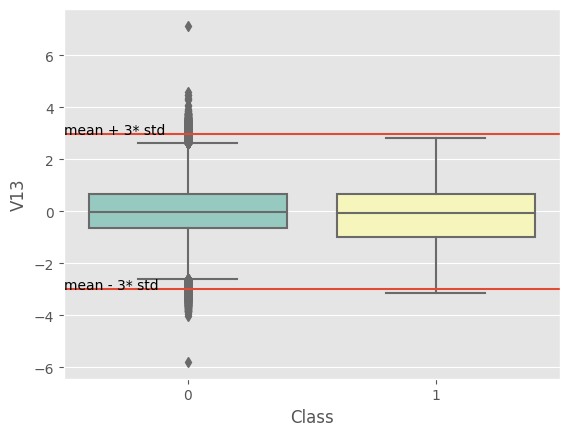

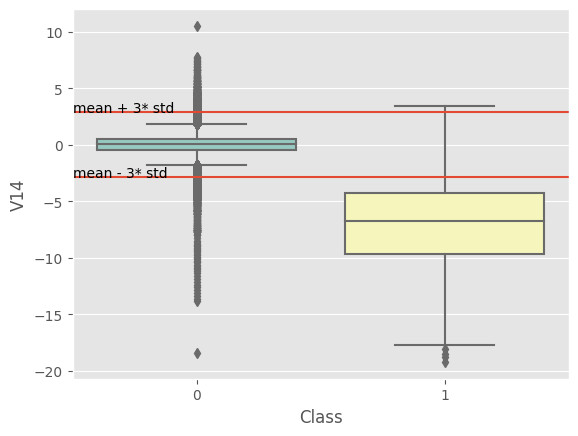

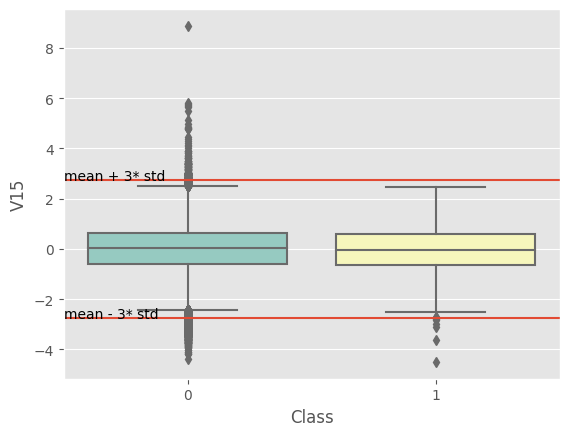

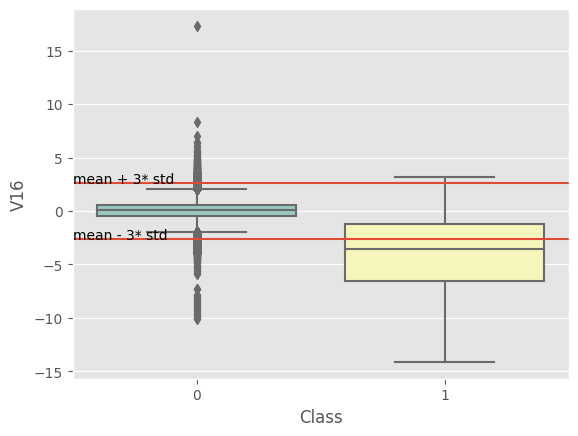

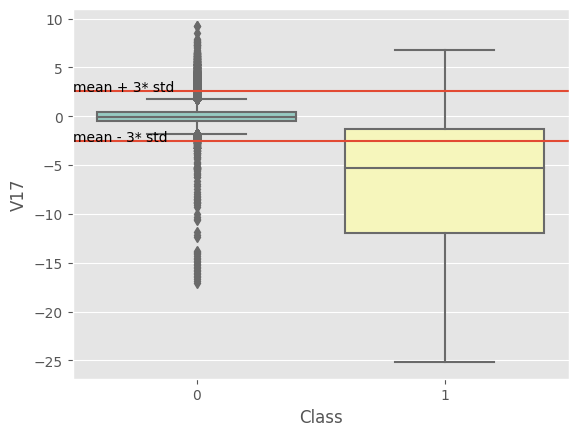

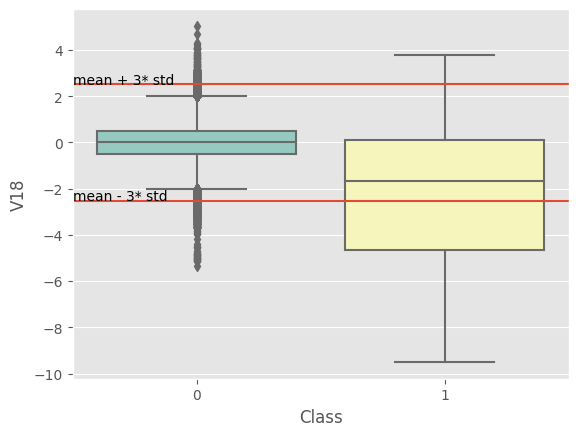

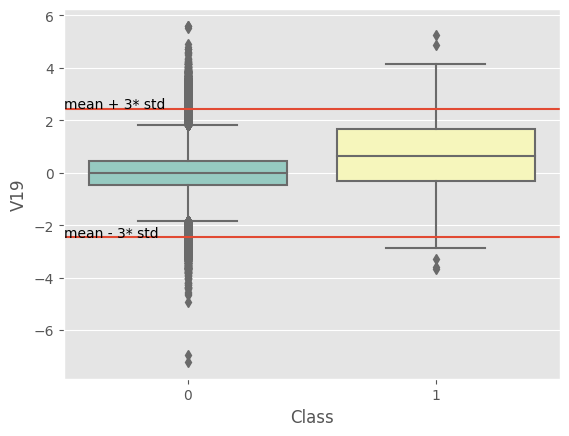

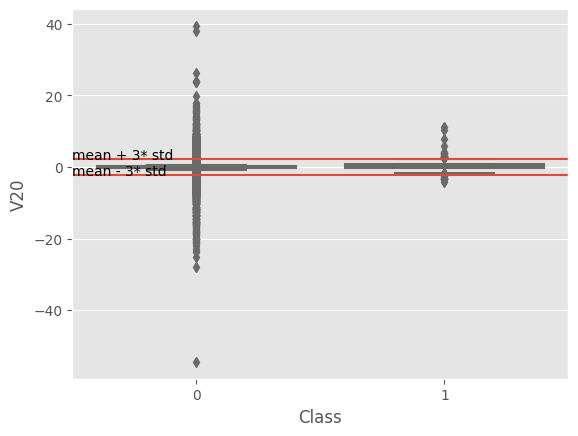

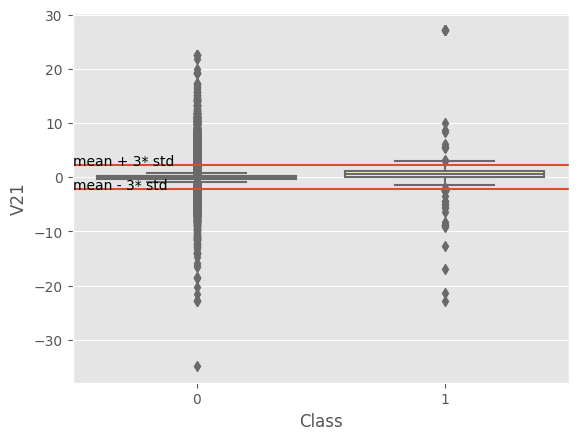

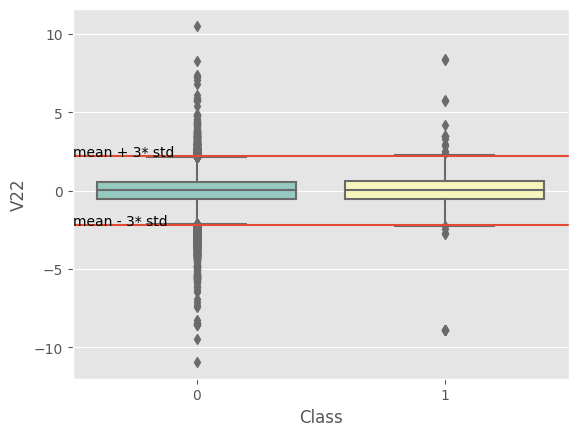

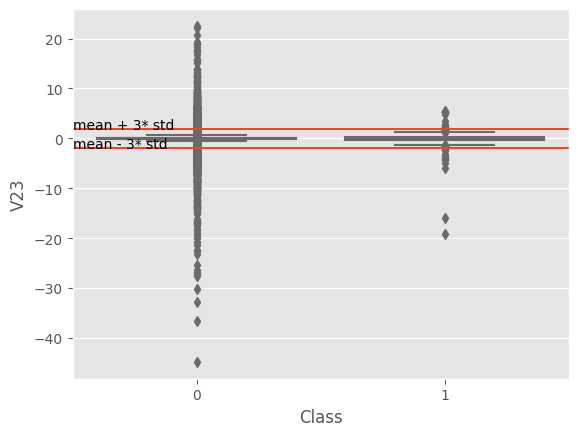

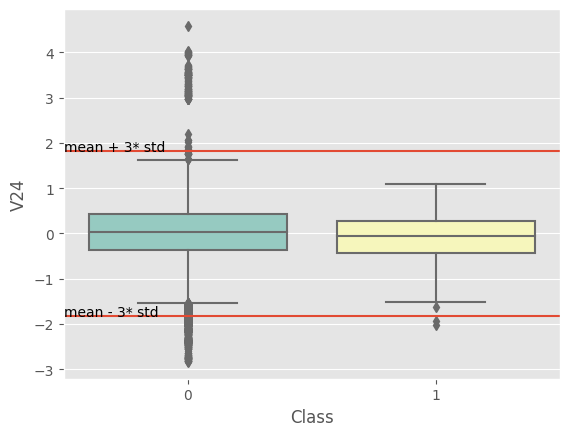

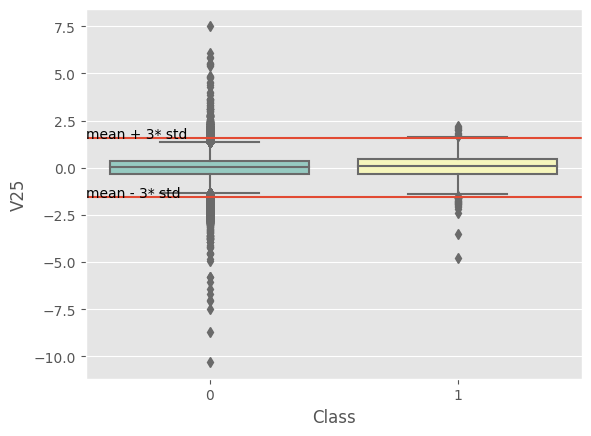

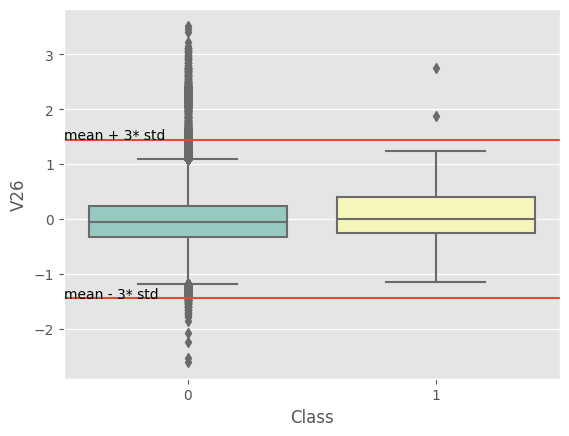

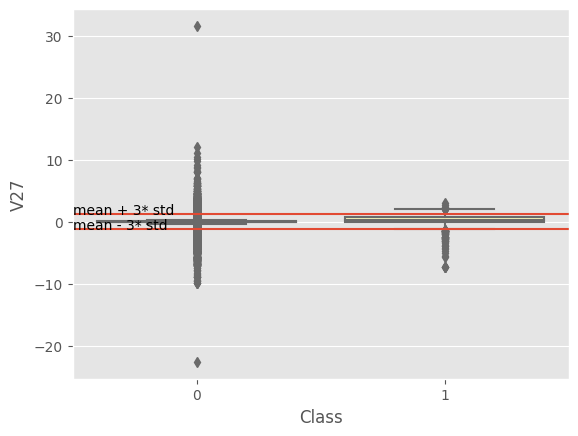

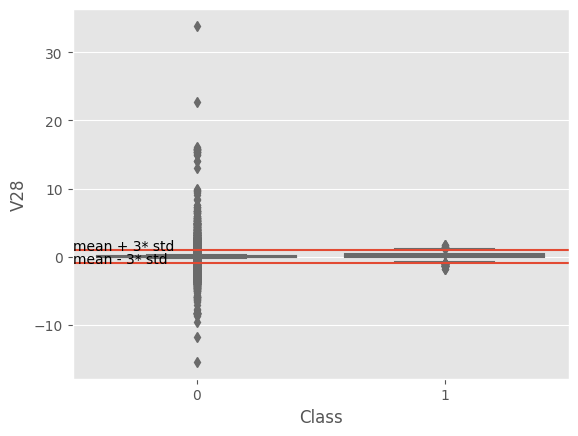

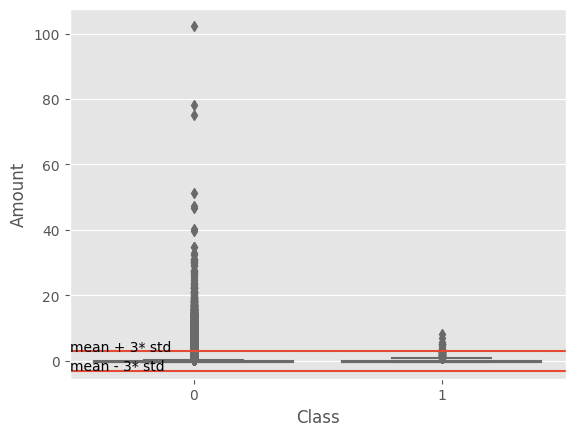

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

for var in df.columns[:-1]:
    # Create a new figure and axis for each iteration
    fig, ax = plt.subplots()

    sns.boxplot(x='Class', y=var, data=df, palette='Set3', ax=ax)
    mean = df[var].mean()
    std = df[var].std()
    ax.axhline(mean - 3 * std, 0, 1)
    ax.text(-0.5, mean - 3 * std, 'mean - 3* std', rotation=0)
    ax.axhline(mean + 3 * std, 0, 1)
    ax.text(-0.5, mean + 3 * std, 'mean + 3* std', rotation=0)

# Show the plots after the loop
plt.show()


Split the data in training and test set. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df[['Class']].values, test_size=0.3,random_state=1997)

 # 1. Logistic Regression

In [13]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\Sourav Sahu\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


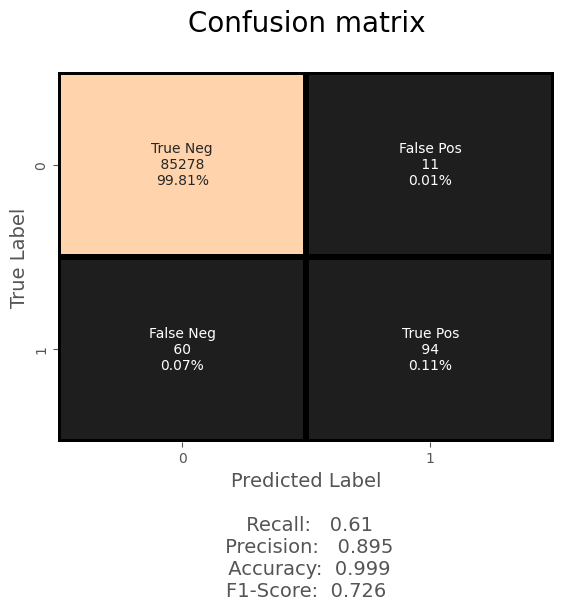

In [14]:
def plot_confusion_matrix(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)

    labels_name = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    labels_count = [value for value in cf_matrix.flatten()]
    labels_percentage = [ "{0:.2%}".format(value) for value in cf_matrix.flatten()/ np.sum(cf_matrix)]

    labels = [f'{x}\n {y} \n{z}' for x, y, z in zip(labels_name, labels_count, labels_percentage)]
    labels = np.array(labels, dtype=str).reshape(2,2)

    recall = cf_matrix[1,1]/(cf_matrix[1,0] + cf_matrix[1,1])
    precision = cf_matrix[1,1]/(cf_matrix[0,1] + cf_matrix[1,1])
    accuracy = (cf_matrix[0, 0] + cf_matrix[1,1])/ np.sum(cf_matrix)
    f1_score = (2*precision*recall)/(precision + recall)

    stats = '\n\n Recall:   {0:.03}\n Precision:   {1:.03}\n Accuracy:  {2:.03}\nF1-Score:  {3:.03}'.format(recall, precision, accuracy, f1_score)

    sns.heatmap(cf_matrix, annot=labels, fmt='', center=3, linewidth=3, linecolor='k', cbar=False)
    plt.title('Confusion matrix\n', fontsize=20)
    plt.xlabel('Predicted Label'+stats, fontsize=14)
    plt.ylabel('True Label', fontsize=14)

    plt.show()
plot_confusion_matrix(y_test, y_pred)


- __Upper Left Square__: The amount of correctly classified by model of no fraud transactions.
- __Upper Right Square__: The amount of incorrectly classified transactions as fraud cases, but the actual label is no fraud .
- __Lower Left Square__: The amount of incorrectly classified transactions as no fraud cases, but the actual label is fraud .
- __Lower Right Square__: The amount of correctly classified by our model of fraud transactions.


- *Recall*: Out of all the positive classes, how much we predicted correctly.  (TP/TP+FN)
- *Precision*: Out of all the positive classes we have predicted, how many are actually positive. (TP/TP+FP)
- *Accuracy*: Out of all the classes, how much we predicted correctly 
- *F-measure*: 2(Recall) (Precision)/(Recall + Precision)

# 2. Predict Proba

predict_proba gives you the probabilities for the target (0 and 1 in this case) in array form. The number of probabilities for each row is equal to the number of categories in target variable. 

In [15]:
y_prob = lr.predict_proba(X_test)
y_prob = y_prob[:, 1] # Probability of getting the output 1 (Fraud)

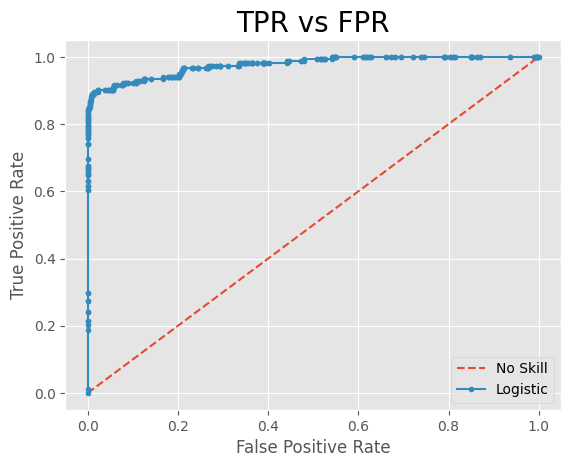

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# gmeans = np.sqrt(tpr*(1-fpr))
# ix = np.argmax(gmeans)
# print("Best thresholds=%f, G-Mean=%.3f" %(thresholds[ix], gmeans[ix]))

plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='best', sizes=(200, 100))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('TPR vs FPR', fontsize=20)
plt.show()

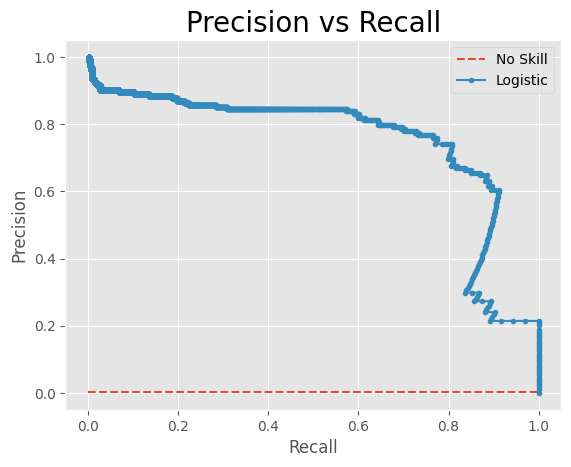

In [17]:
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, y_prob)
no_skill = len(y_test[y_test==1])/ len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_precision, lr_recall, marker='.', label='Logistic')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision vs Recall', fontsize=20)
plt.show()

# 3. Change the Threshold

In [18]:
print("Slide, Range -> (0.001, 0.04)")
def update(var=0.004):
    print("y_prob should be greater than >", var)
    predict_mine = np.where(y_prob > var, 1, 0)
    plot_confusion_matrix(y_test, predict_mine)

interact(update, var=FloatSlider(min=0.001, max=0.04, step=0.001))

Slide, Range -> (0.001, 0.04)


interactive(children=(FloatSlider(value=0.001, description='var', max=0.04, min=0.001, step=0.001), Output()),…

<function __main__.update(var=0.004)>

# 4. Logistic Regression with balanced class weight

C:\Users\Sourav Sahu\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


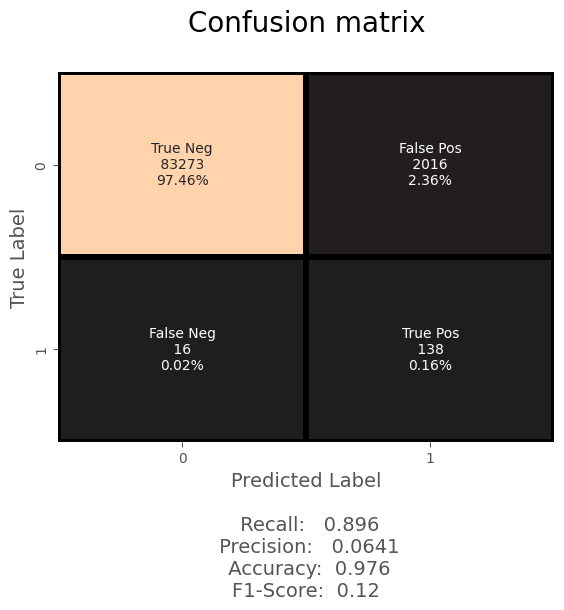

In [19]:

lr_b = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_b.fit(X_train, y_train)
y_pred_b = lr_b.predict(X_test)
plot_confusion_matrix(y_test, y_pred_b)

# 5. Tomek Link

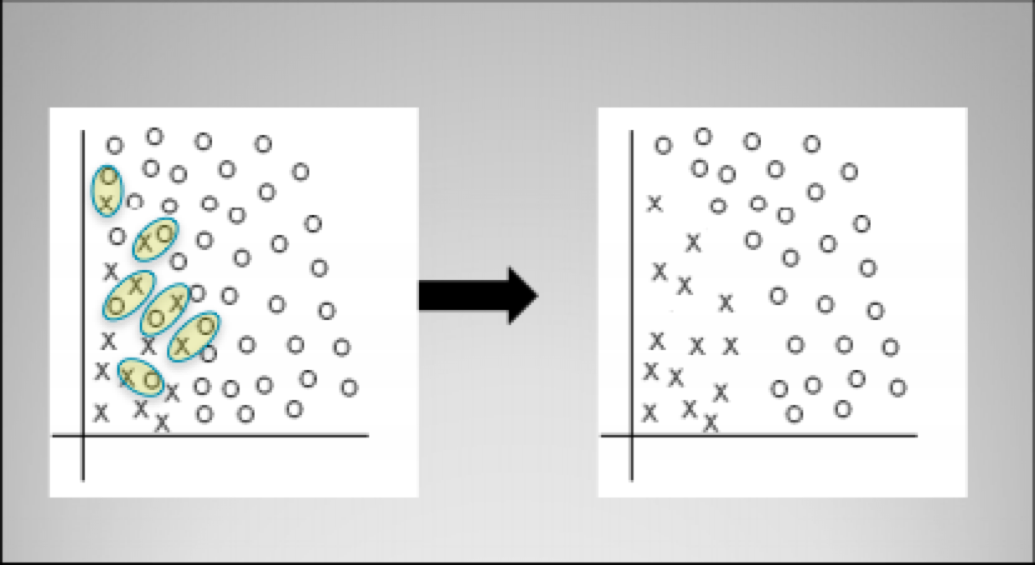

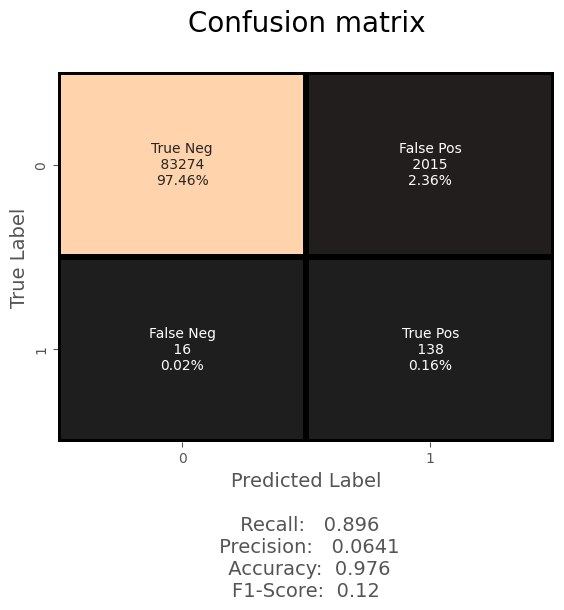

In [28]:
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression

tl = TomekLinks(sampling_strategy='majority')
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)  # Updated line
lr_tl = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_tl.fit(X_train_tl, y_train_tl)
y_pred_tl = lr_tl.predict(X_test)
plot_confusion_matrix(y_test, y_pred_tl)


# 6. Synthetic Minority Oversampling Technique( SMOTE)

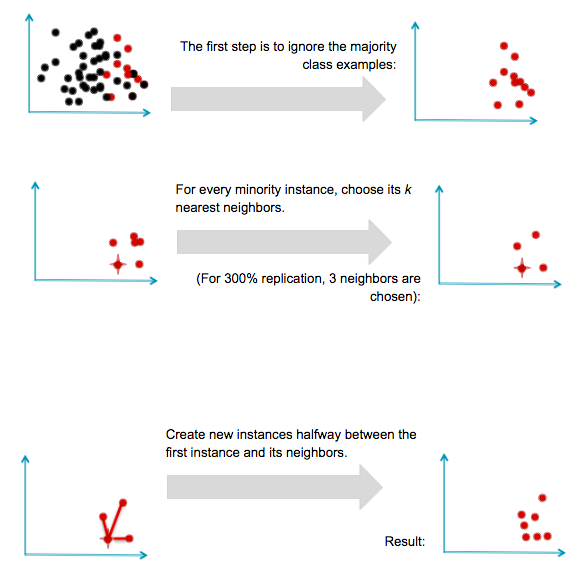

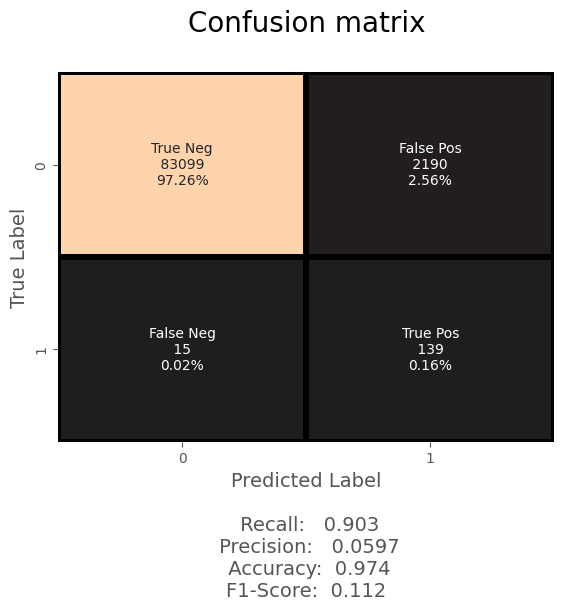

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression


smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)  # Updated line
lr_sm = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = lr_sm.predict(X_test)
plot_confusion_matrix(y_test, y_pred_sm)


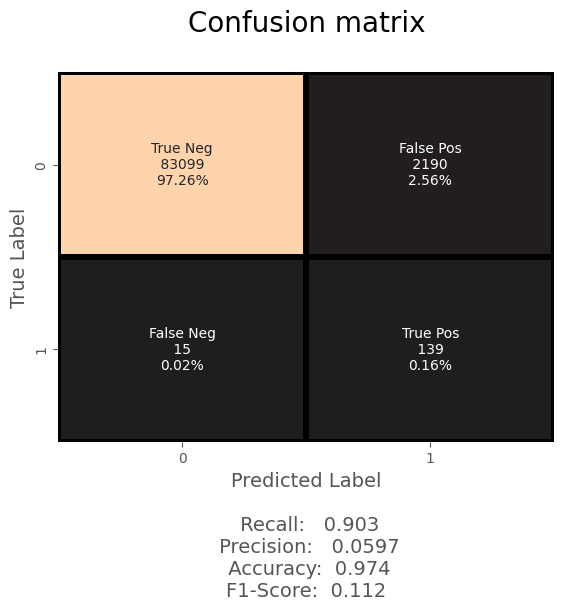

In [33]:
lr_sm = LogisticRegression(max_iter=1000)
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_sm = lr_sm.predict(X_test)
plot_confusion_matrix(y_test, y_pred_sm)